In [39]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
from random import random

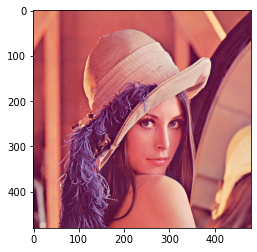

In [40]:
img = cv2.imread("C:\\Photo\\Lena.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [41]:
def conv(img):
    weights = [[[[random() for k in range(3)] for j in range(3)] for i in range(3)] for m in range(5)]
    b = [random() for i in range(5)]
    shape = img.shape
    out_shape = shape[0] - 2, shape[1] - 2, 5
    res = np.zeros(out_shape, 'float')
    for i in range(out_shape[0]):
        for j in range(out_shape[1]):
            for M in range(5):
                res[i][j][M] = sum([weights[M][I][J][K] * img[i + I][j + J][K] for K in range(3) for J in range(3) for I in range(3)]) + b[M]
    return res

In [42]:
def norm(img):
    res = np.zeros(img.shape,'float')
    a = [random() for i in range(5)]
    b = [random() for i in range(5)]
    for M in range(5):
        mean = np.mean(img[:,:,M])
        std = np.std(img[:,:,M])
        res[:,:,M] = a[M]*(img[:,:,M]-mean)/std + b[M]
    return res


In [43]:
def maxpooling(arr):
    result = np.zeros(
        (arr.shape[0], int(arr.shape[1] / 2), int(arr.shape[2] / 2)), dtype=np.float32)
    for m in range(result.shape[0]):
        for k in range(result.shape[1]):
            for l in range(result.shape[2]):
                result[m, k, l] = max(arr[m, k * 2, l * 2], arr[m, k * 2, l * 2 + 1],
                                      arr[m, k * 2 + 1, l * 2], arr[m, k * 2 + 1, l * 2 + 1])
    return result

In [44]:
def relu(arr):
    result = np.zeros(arr.shape, dtype=np.float32)
    for m in range(result.shape[0]):
        for i in range(result.shape[1]):
            for j in range(result.shape[2]):
                result[m, i, j] = max(0, arr[m, i, j])
    return result

In [45]:
def softmax(arr):
    result = np.zeros(arr.shape, dtype=np.float32)
    for x in range(result.shape[1]):
        for y in range(result.shape[2]):
            s = 0
            for k in range(result.shape[0]):
                s += math.exp(arr[k, x, y])
            for m in range(result.shape[0]):
                result[m, x, y] = math.exp(arr[m, x, y]) / s
    return result


In [46]:
nfilters = 5
kernels = np.random.uniform(-1, 1, size=(nfilters, 3, 3, 3))

arr = conv(img)
print("conv", arr.shape, arr, sep="\n")
arr = norm(arr)
print("norm", arr.shape, arr, sep="\n")
arr = relu(arr)
print("relu", arr.shape, arr, sep="\n")
arr = maxpooling(arr)
print("maxpooling", arr.shape, arr, sep="\n")
arr = softmax(arr)
print("softmax", arr.shape, arr, sep="\n")

conv
(478, 478, 5)
[[[2069.09597504 2287.86372352 1918.26903021 1837.05905831 1894.74959623]
  [2085.86449212 2296.98656494 1934.24205813 1849.3168761  1917.01536431]
  [2082.9813315  2308.20397264 1955.07597455 1866.37805218 1928.32849691]
  ...
  [1810.78771367 1986.45602774 1668.02989916 1602.9959744  1644.14960834]
  [1720.49852939 1875.35640598 1584.05647451 1527.1679185  1550.29157164]
  [1554.5511766  1668.53231188 1411.27472939 1373.71764203 1387.09216168]]

 [[2070.14717516 2292.6351542  1928.27409521 1840.27231046 1900.10303158]
  [2089.16925976 2299.52179646 1934.28016902 1851.76323852 1919.31760456]
  [2085.31300962 2308.22744592 1950.47735617 1864.91159522 1921.292835  ]
  ...
  [1726.60905121 1869.90867858 1566.99157736 1505.70114638 1555.02101244]
  [1596.47393518 1697.5730026  1425.92681352 1391.32716652 1422.53936848]
  [1381.03605943 1431.58867335 1236.60946264 1202.9711446  1217.90970484]]

 [[2078.6182678  2300.49958605 1941.88448247 1853.98657149 1905.4691086 ]
  [